# Notebook for LMQAModelFlow 
## Update system path

Note: https://github.com/explosion/spaCy/issues/4577 for en_core_web_sm issue
https://github.com/explosion/spaCy/discussions/7764 for ValueError: [E967] No factory meta information found for 'tagger'. This is likely a bug in spaCy.

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [2]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.client import Client
from uniflow.flow.flow_factory import FlowFactory
from uniflow.config import LMQGConfig
from uniflow.model.config import LMQGModelConfig
from uniflow.viz import Viz

import en_core_web_sm
nlp = en_core_web_sm.load()


/opt/conda/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
FlowFactory.list()

['LinearFlow',
 'FewShotModelFlow',
 'ModelFlow',
 'OpenAIJsonModelFlow',
 'HuggingFaceModelFlow',
 'LMQGModelFlow']

## Run model flow to generate data

In [4]:
data = [{"context": """William Turner was an English painter who specialised in watercolour landscapes. He is often known
          "as William Turner of Oxford or just Turner of Oxford to distinguish him from his contemporary,
          "J. M. W. Turner. Many of Turner's paintings depicted the countryside around Oxford. One of his
          "best known pictures is a view of the city of Oxford from Hinksey Hill."""},
        {"context": """My name is bobby and I am a talent software engineer working on AI/ML."""}]

In [5]:
config = LMQGConfig(model_config=LMQGModelConfig(batch_size=1))
client = Client(config)

/opt/conda/envs/uniflow/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:671: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/opt/conda/envs/uniflow/lib/python3.10/site-packages/transformers/models/auto/configuration_auto.py:1033: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/opt/conda/envs/uniflow/lib/python3.10/site-packages/transformers/modeling_utils.py:2570: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/opt/conda/envs/uniflow/lib/python3.10/site-packages/transformers/utils/hub.py:374: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


In [6]:
output = client.run(data)

100%|██████████| 4/4 [00:00<00:00, 1223.10it/s]


100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


In [7]:
output[0]['output'][0]['response']

[[('Who was an English painter who specialised in watercolour landscapes?',
   'William Turner'),
  ('What is William Turner often known as?', 'William Turner of Oxford'),
  ("What did many of William Turner's paintings depict?", 'countryside'),
  ('From where did William Turner view the city of Oxford?', 'Hinksey Hill.')]]

## Plot model flow graph

In [8]:
graph = Viz.to_digraph(output[0]['root'])

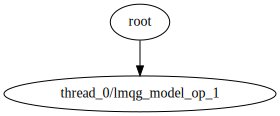

In [9]:
display(graph)

In [10]:
graph = Viz.to_digraph(output[1]['root'])

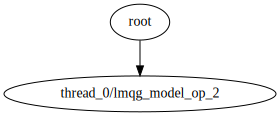

In [11]:
display(graph)